<a href="https://colab.research.google.com/github/LamaAls04/customer-purchase-prediction-ML/blob/main/CustomerPurchaseBehaviorPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning project


# Predicting Customer Purchase Behavior

### Dataset Description:
Customer Purchase Behavior Dataset is sourced from Kaggle, containing 1500 rows and 9 columns. The dataset includes demographic information, purchasing habits, and other relevant features, aimed at predicting customer purchase behavior.

### Dataset Features:
- Age: Customer's age
- Gender: Customer's gender (0: Male, 1: Female)
- Annual Income: Annual income of the customer in dollars
- Number of Purchases: Total number of purchases made by the customer
- Product Category: Category of the purchased product (0: Electronics, 1: Clothing, 2: Home Goods, 3: Beauty, 4: Sports)
- Time Spent on Website: Time spent by the customer on the website in minutes
- Loyalty Program: Whether the customer is a member of the loyalty program (0: No, 1: Yes)
- Discounts Availed: Number of discounts availed by the customer (range: 0-5)
- PurchaseStatus (Target Variable): Likelihood of the customer making a purchase (0: No, 1: Yes)

# EDA

### Load Dataset

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving customer_purchase_data (3).csv to customer_purchase_data (3).csv


In [ ]:
#Load Dataset
df = pd.read_csv("customer_purchase_data (3).csv")

### Overview of the data

In [ ]:
# Preview the first 10 rows
df.head(10)

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1
5,66,1,37758.117475,14,4,17.827493,0,2,0
6,39,1,126883.385286,16,3,42.085384,1,4,1
7,64,1,39707.359724,13,2,17.190292,1,0,0
8,43,0,102797.301269,20,1,6.023475,0,3,0
9,20,1,63854.921080,16,0,38.572466,0,5,1


In [ ]:
df.shape
#the data has 1500 rows and 9 columns

(1500, 9)

In [ ]:
# Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1500 non-null   int64  
 1   Gender              1500 non-null   int64  
 2   AnnualIncome        1500 non-null   float64
 3   NumberOfPurchases   1500 non-null   int64  
 4   ProductCategory     1500 non-null   int64  
 5   TimeSpentOnWebsite  1500 non-null   float64
 6   LoyaltyProgram      1500 non-null   int64  
 7   DiscountsAvailed    1500 non-null   int64  
 8   PurchaseStatus      1500 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 105.6 KB


In [ ]:
 df['PurchaseStatus'].value_counts()

,count
PurchaseStatus,
0,852
1,648




*   Class 0: about 53.3%
*   Class 1: about 46.7%

The data is relatively balanced. The difference between the two classes is small (less than 10%), so we do not need to apply techniques like oversampling or undersampling.

In [ ]:
df.describe()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,44.298667,0.504667,84249.164338,10.420000,2.012667,30.469040,0.326667,2.555333,0.43200
std,15.537259,0.500145,37629.493078,5.887391,1.428005,16.984392,0.469151,1.705152,0.49552
min,18.000000,0.000000,20001.512518,0.000000,0.000000,1.037023,0.000000,0.000000,0.00000
25%,31.000000,0.000000,53028.979155,5.000000,1.000000,16.156700,0.000000,1.000000,0.00000
50%,45.000000,1.000000,83699.581476,11.000000,2.000000,30.939516,0.000000,3.000000,0.00000
75%,57.000000,1.000000,117167.772858,15.000000,3.000000,44.369863,1.000000,4.000000,1.00000
max,70.000000,1.000000,149785.176481,20.000000,4.000000,59.991105,1.000000,5.000000,1.00000


## Data Visualization

### Pie chart

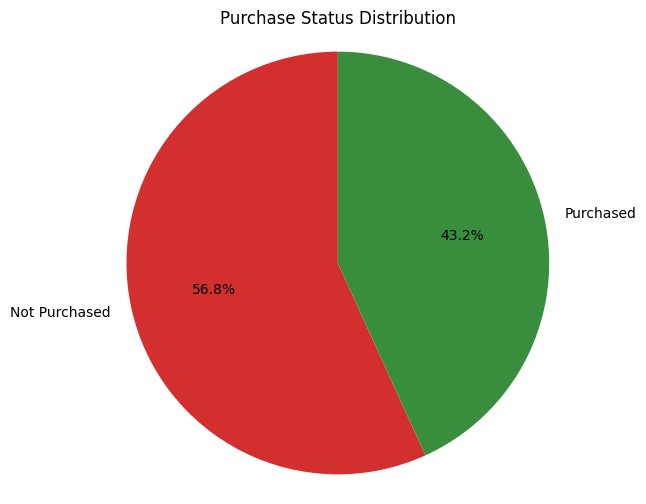

In [ ]:
import matplotlib.pyplot as plt

labels = ['Not Purchased', 'Purchased']
colors = ['#D32F2F', '#388E3C']

counts = df['PurchaseStatus'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90,  colors=colors)
plt.title('Purchase Status Distribution')
plt.axis('equal')
plt.show()

The data is relatively balanced.

### Histogram

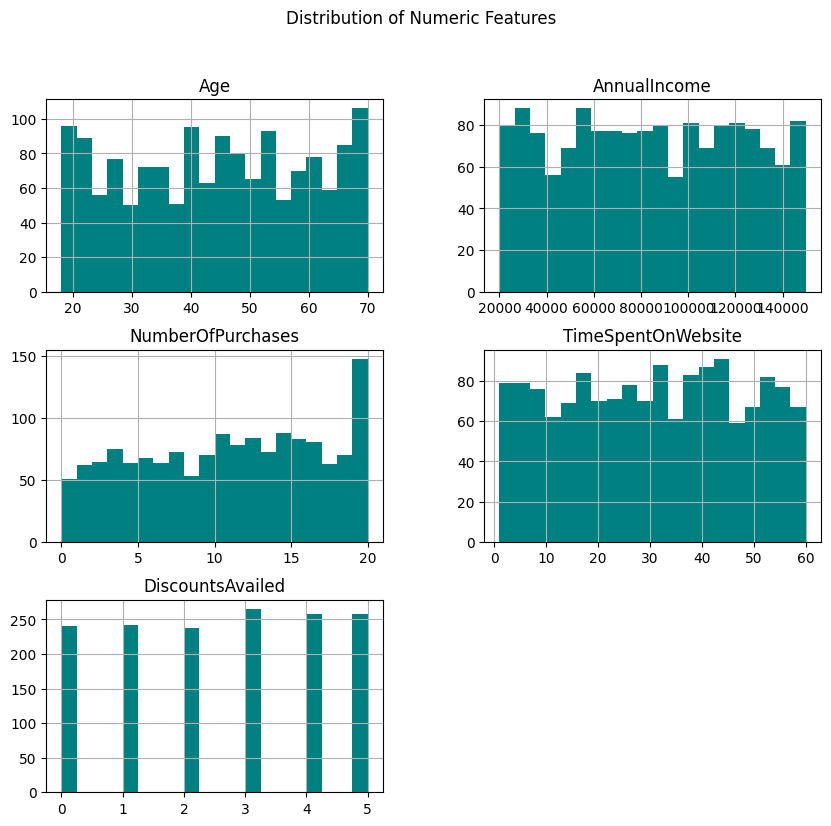

In [ ]:
# Plotting the distribution of numeric features
numeric_features = ['Age', 'AnnualIncome', 'NumberOfPurchases', 'TimeSpentOnWebsite', 'DiscountsAvailed']
df[numeric_features].hist(bins=20, figsize=(10, 9), color='teal')
plt.suptitle('Distribution of Numeric Features')
plt.show()

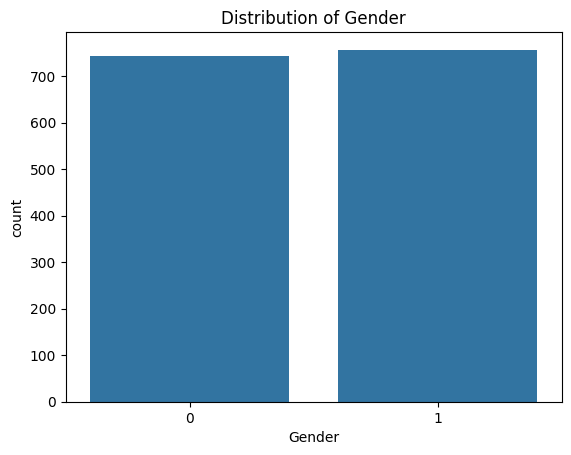

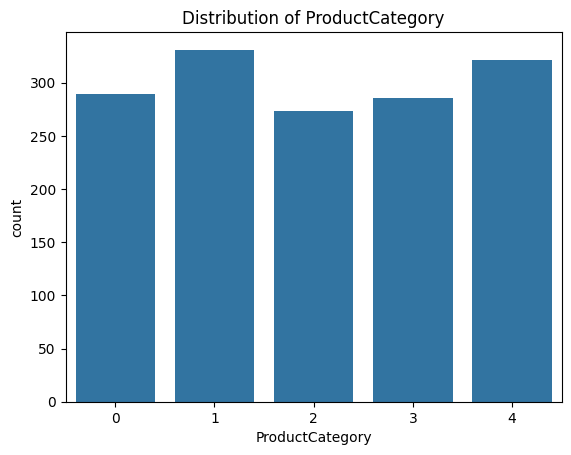

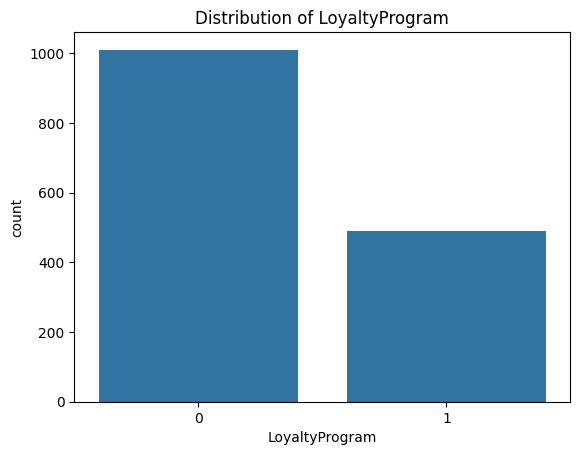

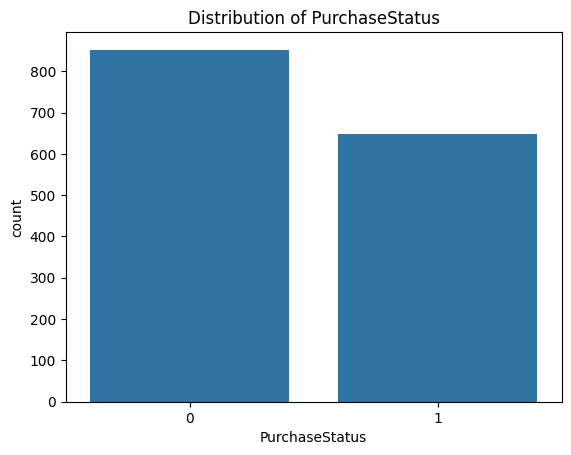

In [ ]:
# Plotting the distribution of categorical features
categorical_features = ['Gender', 'ProductCategory', 'LoyaltyProgram', 'PurchaseStatus']
for feature in categorical_features:
    sns.countplot(x=df[feature])
    plt.title(f'Distribution of {feature}')
    plt.show()

### Heatmap

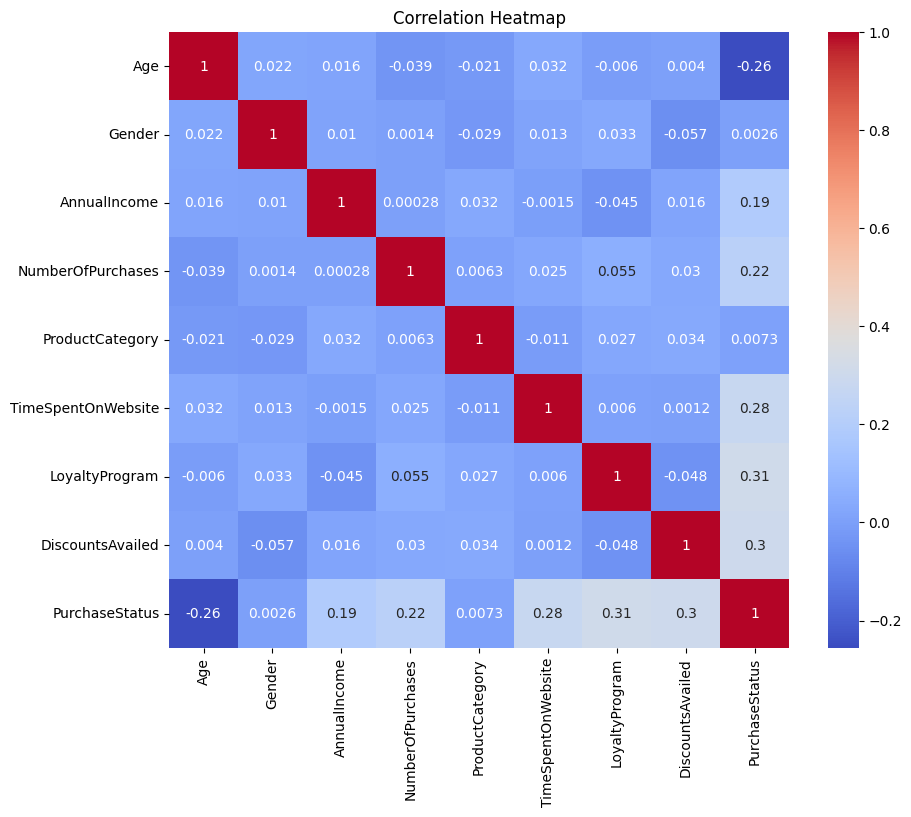

LoyaltyProgram, DiscountsAvailed, and TimeSpentOnWebsite show the strongest positive correlations, indicating that customers who are loyal, use discounts, 
or spend more time on the website are more likely to make a purchase. In contrast, Age has a moderate negative correlation, suggesting older customers are less likely to purchase. 
Other features like Gender and ProductCategory show minimal correlation, implying a limited impact on purchasing behavior.


In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
print('LoyaltyProgram, DiscountsAvailed, and TimeSpentOnWebsite show the strongest positive correlations, indicating that customers who are loyal, use discounts, \nor spend more time on the website are more likely to make a purchase. In contrast, Age has a moderate negative correlation, suggesting older customers are less likely to purchase. \nOther features like Gender and ProductCategory show minimal correlation, implying a limited impact on purchasing behavior.')
#Focus on LoyaltyProgram, DiscountsAvailed, and TimeSpentOnWebsite — they are strong predictors of purchase.

### Scatter plot

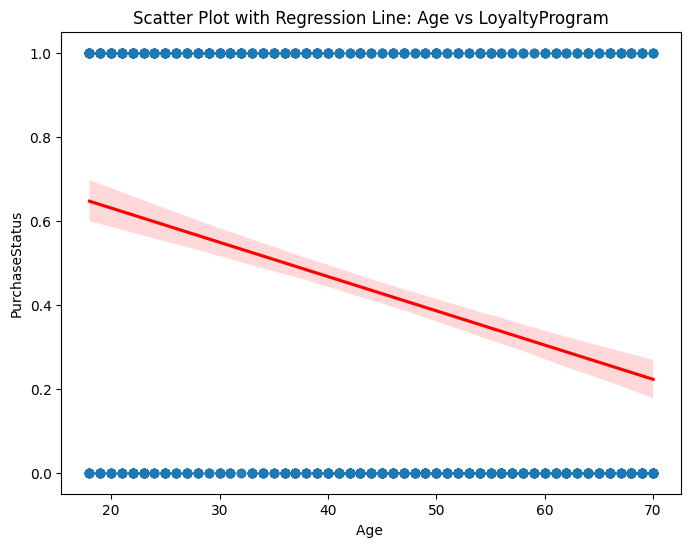

Age has a moderate negative correlation with Purchase status, suggesting older customers are less likely to purchase.


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot with a regression line
plt.figure(figsize=(8, 6))
sns.regplot(x="Age", y="PurchaseStatus", data=df[["Age", "PurchaseStatus"]], line_kws={"color": "red"}, scatter_kws={"alpha": 0.6})
plt.xlabel("Age ")
plt.ylabel("PurchaseStatus")
plt.title("Scatter Plot with Regression Line: Age vs LoyaltyProgram")
plt.show()
print('Age has a moderate negative correlation with Purchase status, suggesting older customers are less likely to purchase.')

# Data Preprocessing

In [ ]:
# Check for missing values
print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 Age                   0
Gender                0
AnnualIncome          0
NumberOfPurchases     0
ProductCategory       0
TimeSpentOnWebsite    0
LoyaltyProgram        0
DiscountsAvailed      0
PurchaseStatus        0
dtype: int64


In [ ]:
# Outlier detection using the IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outlier_counts = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
print("Outliers per column:\n", outlier_counts)

Outliers per column:
 Age                   0
Gender                0
AnnualIncome          0
NumberOfPurchases     0
ProductCategory       0
TimeSpentOnWebsite    0
LoyaltyProgram        0
DiscountsAvailed      0
PurchaseStatus        0
dtype: int64


The dataset has neither missing values nor outliers.


### Check and handle redundancies

In [ ]:
#Check for duplicates
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 112


In [ ]:
# handle redundancies by removing them
df = df.drop_duplicates()

In [ ]:
print("Duplicate rows:", df.duplicated().sum())
print ('no duplicate rows')

Duplicate rows: 0
no duplicate rows


In [ ]:
# Preview the first 10 rows
df.head(10)

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1
5,66,1,37758.117475,14,4,17.827493,0,2,0
6,39,1,126883.385286,16,3,42.085384,1,4,1
7,64,1,39707.359724,13,2,17.190292,1,0,0
8,43,0,102797.301269,20,1,6.023475,0,3,0
9,20,1,63854.921080,16,0,38.572466,0,5,1


### One-hot encode ProductCategory

In [ ]:
# One-hot encode ProductCategory
df_encoded = pd.get_dummies(df, columns=['ProductCategory'], prefix='PC', dtype = int)


In [ ]:
# View result
#PC means Product Category
df_encoded.head(10)

,Age,Gender,AnnualIncome,NumberOfPurchases,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus,PC_0,PC_1,PC_2,PC_3,PC_4
0,40,1,66120.267939,8,30.568601,0,5,1,1,0,0,0,0
1,20,1,23579.773583,4,38.240097,0,5,0,0,0,1,0,0
2,27,1,127821.306432,11,31.633212,1,0,1,0,0,1,0,0
3,24,1,137798.623120,19,46.167059,0,4,1,0,0,0,1,0
4,31,1,99300.964220,19,19.823592,0,0,1,0,1,0,0,0
5,66,1,37758.117475,14,17.827493,0,2,0,0,0,0,0,1
6,39,1,126883.385286,16,42.085384,1,4,1,0,0,0,1,0
7,64,1,39707.359724,13,17.190292,1,0,0,0,0,1,0,0
8,43,0,102797.301269,20,6.023475,0,3,0,0,1,0,0,0
9,20,1,63854.921080,16,38.572466,0,5,1,1,0,0,0,0


### Rescale the needed features

In [ ]:
from sklearn.preprocessing import StandardScaler

df_std = df_encoded.copy()

numerical_cols = [
    'Age',
    'AnnualIncome',
    'NumberOfPurchases',
    'TimeSpentOnWebsite',
    'DiscountsAvailed'
]
# Initialize and apply StandardScaler
scaler = StandardScaler()
df_std[numerical_cols] = scaler.fit_transform(df_std[numerical_cols])

# Preview the standardized data
print(df_std[numerical_cols].describe().round(3))

            Age  AnnualIncome  NumberOfPurchases  TimeSpentOnWebsite  \
count  1388.000      1388.000           1388.000            1388.000   
mean      0.000         0.000              0.000               0.000   
std       1.000         1.000              1.000               1.000   
min      -1.675        -1.724             -1.798              -1.751   
25%      -0.852        -0.824             -0.775              -0.847   
50%       0.004        -0.002              0.077               0.027   
75%       0.844         0.866              0.759               0.820   
max       1.683         1.734              1.611               1.723   

       DiscountsAvailed  
count          1388.000  
mean             -0.000  
std               1.000  
min              -1.536  
25%              -0.947  
50%               0.230  
75%               0.818  
max               1.407  


In [ ]:
df_std.head(10)

,Age,Gender,AnnualIncome,NumberOfPurchases,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus,PC_0,PC_1,PC_2,PC_3,PC_4
0,-0.254456,1,-0.495070,-0.434443,-0.010544,0,1.406691,1,1,0,0,0,0
1,-1.546283,1,-1.628648,-1.116191,0.441498,0,1.406691,0,0,0,1,0,0
2,-1.094144,1,1.149081,0.076869,0.052188,1,-1.535574,1,0,0,1,0,0
3,-1.287918,1,1.414947,1.440365,0.908594,0,0.818238,1,0,0,0,1,0
4,-0.835778,1,0.389098,1.440365,-0.643694,0,-1.535574,1,0,1,0,0,0
5,1.424918,1,-1.250837,0.588180,-0.761314,0,-0.358668,0,0,0,0,0,1
6,-0.319048,1,1.124088,0.929054,0.668082,1,0.818238,1,0,0,0,1,0
7,1.295736,1,-1.198896,0.417743,-0.798861,1,-1.535574,0,0,0,1,0,0
8,-0.060682,0,0.482265,1.610802,-1.456865,0,0.229785,0,0,1,0,0,0
9,-1.546283,1,-0.555434,0.929054,0.461083,0,1.406691,1,1,0,0,0,0


# ML

## Data Spliting

In [ ]:
# Split data
X = df_std.drop('PurchaseStatus', axis=1)
y = df_std['PurchaseStatus']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## xgboost

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(eval_metric='logloss')
xgb.fit(X_train, y_train)

y_train_pred_xgb = xgb.predict(X_train)
y_pred_xgb = xgb.predict(X_test)

print('XGBoost:')
print('Training Accuracy : ', accuracy_score(y_train, y_train_pred_xgb))
print('Test Accuracy : ', accuracy_score(y_test, y_pred_xgb))

XGBoost:
Training Accuracy :  1.0
Test Accuracy :  0.9028776978417267


XGBoost suffers from over fitting since the gap is 0.097 wich is more than 0.05

In [ ]:
CR = classification_report(y_test, y_pred_xgb)
print("Classification Report:")
print(CR)

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       149
           1       0.90      0.89      0.89       129

    accuracy                           0.90       278
   macro avg       0.90      0.90      0.90       278
weighted avg       0.90      0.90      0.90       278



## Logistic Regression

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()
lg.fit(X_train, y_train)

y_train_pred_lg = lg.predict(X_train)
y_pred_lg = lg.predict(X_test)

print('Logistic Regression:')
print('Training Accuracy : ', accuracy_score(y_train, y_train_pred_lg))
print('Test Accuracy : ', accuracy_score(y_test, y_pred_lg))

Logistic Regression:
Training Accuracy :  0.80990990990991
Test Accuracy :  0.841726618705036


Logistic Regression does not suffer from overfitting or under fitting since the test accuracy is more than 80% and the gap is less than 0.05

In [ ]:
CR = classification_report(y_test, y_pred_lg)
print("Logistic Regression Classification Report:")
print(CR)

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       149
           1       0.82      0.84      0.83       129

    accuracy                           0.84       278
   macro avg       0.84      0.84      0.84       278
weighted avg       0.84      0.84      0.84       278



## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_train_pred_rf = rf.predict(X_train)
y_pred_rf = rf.predict(X_test)

print('Random Forest:')
print('Training Accuracy : ', accuracy_score(y_train, y_train_pred_rf))
print('Test Accuracy : ', accuracy_score(y_test, y_pred_rf))

Random Forest:
Training Accuracy :  1.0
Test Accuracy :  0.9172661870503597


Random Forest suffers from over fitting since the gap is 0.086 wich is more than 0.05

In [ ]:
CR = classification_report(y_test, y_pred_rf)
print("Random Forest Classification Report:")
print(CR)

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       149
           1       0.92      0.90      0.91       129

    accuracy                           0.92       278
   macro avg       0.92      0.92      0.92       278
weighted avg       0.92      0.92      0.92       278



## Support Vector

In [ ]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)

y_train_pred_svm = svm.predict(X_train)
y_pred_svm = svm.predict(X_test)

print('Support Vector Machine:')
print('Training Accuracy : ', accuracy_score(y_train, y_train_pred_svm))
print('Test Accuracy : ', accuracy_score(y_test, y_pred_svm))

Support Vector Machine:
Training Accuracy :  0.8954954954954955
Test Accuracy :  0.8633093525179856


Support Vector Machine does not suffer from overfitting or under fitting since the test accuracy is more than 80% and the gap is 0.032 wich is less than 0.05

In [ ]:
CR = classification_report(y_test, y_pred_svm)
print("Classification Report:")
print(CR)

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.87       149
           1       0.86      0.84      0.85       129

    accuracy                           0.86       278
   macro avg       0.86      0.86      0.86       278
weighted avg       0.86      0.86      0.86       278



# Hyperparameter Tuning using GridSearchCV

## XGBoost Tuning

In [ ]:
param_grid_xgb = {
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]

}
grid_xgb = GridSearchCV(XGBClassifier(eval_metric='logloss'), param_grid_xgb, cv=5, scoring='accuracy')
grid_xgb.fit(X_train, y_train)

print("Best Params for XGBoost:", grid_xgb.best_params_)
print("Best Accuracy:", grid_xgb.best_score_)


Best Params for XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Best Accuracy: 0.9333333333333333


In [ ]:
XGB_best = grid_xgb.best_estimator_
XGB_best.fit(X_train, y_train)
y_pred_xgb2 = XGB_best.predict(X_test)
print("XGBoost:")
print("  Training Accuracy After Best Parameters:", XGB_best.score(X_train, y_train))
print("  Testing Accuracy After Best Parameters:", XGB_best.score(X_test, y_test))

XGBoost:
  Training Accuracy After Best Parameters: 0.9513513513513514
  Testing Accuracy After Best Parameters: 0.9244604316546763


In [ ]:
from sklearn.metrics import classification_report

# Classification Report
print("XGBoost after tuning Classification Report:")
print(classification_report(y_test, y_pred_xgb2))

XGBoost after tuning Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       149
           1       0.93      0.91      0.92       129

    accuracy                           0.92       278
   macro avg       0.92      0.92      0.92       278
weighted avg       0.92      0.92      0.92       278



XGBoost after tuning does not suffer from overfitting or underfitting since the test accuracy is more than 80% and the gap is 0.0268 wich less than 0.05

Tuning did improve the XGBoost model by reducing the gap, and now the model does not suffer from overfitting

## Logistic Regression Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid_lr = {'C': [0.1, 1, 10]}
grid_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5, scoring='accuracy')
grid_lr.fit(X_train, y_train)

print("Best Params for Logistic Regression:", grid_lr.best_params_)
print("Best Accuracy:", grid_lr.best_score_)


Best Params for Logistic Regression: {'C': 10}
Best Accuracy: 0.8036036036036036


In [ ]:
# Logistic Regression (Tuned)
LR_best = grid_lr.best_estimator_
LR_best.fit(X_train, y_train)
y_pred_lr_2 = LR_best.predict(X_test)
print("Logistic Regression:")
print("  Training Accuracy After Best Parameters:", LR_best.score(X_train, y_train))
print("  Testing Accuracy After Best Parameters:", LR_best.score(X_test, y_test))
print()

Logistic Regression:
  Training Accuracy After Best Parameters: 0.8108108108108109
  Testing Accuracy After Best Parameters: 0.841726618705036



In [ ]:
from sklearn.metrics import classification_report

# Classification Report
print("Logistic Regression after tuning Classification Report:")
print(classification_report(y_test, y_pred_lr_2))

Logistic Regression after tuning Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       149
           1       0.82      0.84      0.83       129

    accuracy                           0.84       278
   macro avg       0.84      0.84      0.84       278
weighted avg       0.84      0.84      0.84       278



Logistic Regression after tuning does not suffer from overfitting or underfitting since the test accuracy is more than 80% and the gap is -0.03 wich less than 0.05

Tuning did not improve the Logistic Regression model, it still has the same accuarcies from before tuning

## Random Forest Tuning

In [ ]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]


}
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)

print("Best Params for Random Forest:", grid_rf.best_params_)
print("Best Accuracy:", grid_rf.best_score_)


Best Params for Random Forest: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 200}
Best Accuracy: 0.9252252252252253


In [ ]:
# Random Forest (Tuned)
RF_best = grid_rf.best_estimator_
RF_best.fit(X_train, y_train)
y_pred_rf_2 = RF_best.predict(X_test)
print("Random Forest:")
print("  Training Accuracy After Best Parameters:", RF_best.score(X_train, y_train))
print("  Testing Accuracy After Best Parameters:", RF_best.score(X_test, y_test))
print()

Random Forest:
  Training Accuracy After Best Parameters: 0.9540540540540541
  Testing Accuracy After Best Parameters: 0.9172661870503597



In [ ]:
from sklearn.metrics import classification_report

# Classification Report
print("Random Forest after tuning Classification Report:")
print(classification_report(y_test, y_pred_rf_2))

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       149
           1       0.93      0.89      0.91       129

    accuracy                           0.92       278
   macro avg       0.92      0.92      0.92       278
weighted avg       0.92      0.92      0.92       278



Random Forest after tuning does not suffer from overfitting or underfitting since the test accuracy is more than 80% and the gap is 0.036 wich less than 0.05

Tuning did improve the Random Fores model by reducing the gap, so now the Random Fores model does not suffer from overfitting

## SVM Tuning

In [ ]:
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}
grid_svm = GridSearchCV(SVC(), param_grid_svm, cv=5, scoring='accuracy')
grid_svm.fit(X_train, y_train)

print("Best Params for SVM:", grid_svm.best_params_)
print("Best Accuracy:", grid_svm.best_score_)


Best Params for SVM: {'C': 1, 'kernel': 'rbf'}
Best Accuracy: 0.8495495495495495


In [ ]:
# SVM (Tuned)
SVM_best = grid_svm.best_estimator_
SVM_best.fit(X_train, y_train)
y_pred_svm2 = SVM_best.predict(X_test)
print("SVM:")
print("  Training Accuracy After Best Parameters:", SVM_best.score(X_train, y_train))
print("  Testing Accuracy After Best Parameters:", SVM_best.score(X_test, y_test))
print()

SVM:
  Training Accuracy After Best Parameters: 0.8954954954954955
  Testing Accuracy After Best Parameters: 0.8633093525179856



In [ ]:
from sklearn.metrics import classification_report

# Classification Report
print("SVM after tuning Classification Report:")
print(classification_report(y_test, y_pred_svm2))

SVM after tuning Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.87       149
           1       0.86      0.84      0.85       129

    accuracy                           0.86       278
   macro avg       0.86      0.86      0.86       278
weighted avg       0.86      0.86      0.86       278



SVM after tuning does not suffer from overfitting or underfitting since the test accuracy is more than 80% and the gap is 0.032 wich is less than 0.05

Tuning did not improve the SVM model, it still has the same accuarcies from before tuning

## confusion_matrix

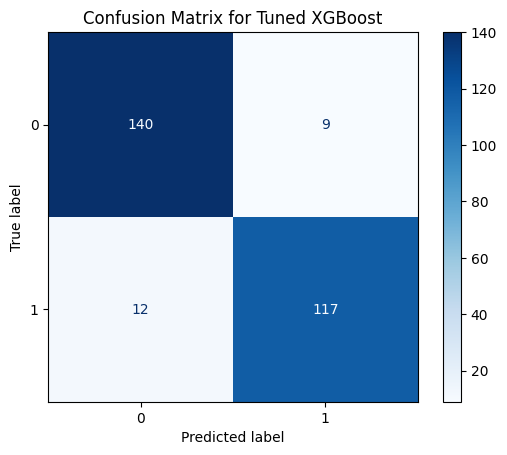

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb2)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for Tuned XGBoost")
plt.show()

### Confusion Matrix Explanation for Proposed Model (XGBoost)
**True Positives (TP) = 117**
The actual class was "Purchase", and the model correctly predicted "Purchase".

**True Negatives (TN) = 140**
The actual class was "No Purchase", and the model correctly predicted "No Purchase".

**False Positives (FP) = 9**
The actual class was "No Purchase", but the model incorrectly predicted "Purchase".

**False Negatives (FN) = 12**
The actual class was "Purchase", but the model incorrectly predicted "No Purchase".

# Conclusion

This project investigated customer purchase behaviour prediction using machine learning. We evaluated Logistic Regression, Random Forest, SVM, and XGBoost. Our methodology involved data preprocessing, including Exploratory Data Analysis (EDA) to understand the data, dropping duplicated rows to ensure data quality, one-hot encoding of categorical features, and scaling numerical features. Following this, we performed hyperparameter tuning using GridSearchCV to optimize each model's performance and mitigate overfitting. After tuning, XGBoost emerged as the top performer and is therefore our proposed model for this project, achieving a training accuracy of 95.1% and a testing accuracy of 92.4%. The tuned XGBoost model demonstrated a minimal difference between training and testing accuracy, indicating good generalization capability. Loyalty program, discounts availed, and website time were identified as key predictors. Future work could involve expanding the dataset with additional behavioural or transactional features to boost model performance and implementing real-time prediction pipelines and tracking model drift over time to help maintain accuracy in dynamic business environments. This project demonstrates the value of machine learning for understanding and predicting customer behaviour, enabling businesses to optimize marketing and sales strategies.